In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MAE0339/CitiByke/202102-citibike-tripdata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#transforma em datetime
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])
#cria coluna duração da viagem
data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds().div(60)

In [ ]:
#resumo da variável trip_duration
data['trip_duration'].describe()

count    649983.000000
mean         16.713549
std         340.841273
min      -10008.900000
25%           5.516667
50%           9.666667
75%          17.066667
max      165074.550000
Name: trip_duration, dtype: float64

In [ ]:
#retiramos da base os trip duration negativos
data =  data[data['trip_duration']>0]

In [ ]:
#quantil 99%
data['trip_duration'].quantile(0.99)

60.4

In [ ]:
#retiramos da base tempos maiores que 60 min
data = data[data['trip_duration'] <= 60]

[]

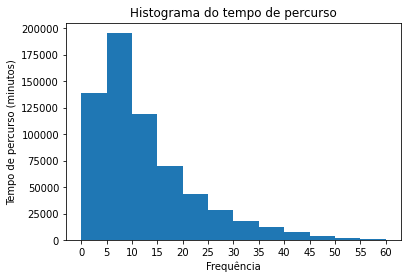

In [ ]:
#histograma do tempo do percurso
plt.hist(data['trip_duration'], bins =np.arange(0,65,5) )
#titulo
plt.title('Histograma do tempo de percurso')
#titulo dos eixos
plt.xlabel('Frequência')
plt.ylabel('Tempo de percurso (minutos)')
#altera marcadores do eixo x
plt.xticks(np.arange(0,65,5))
#plota o grafico
plt.plot()

[]

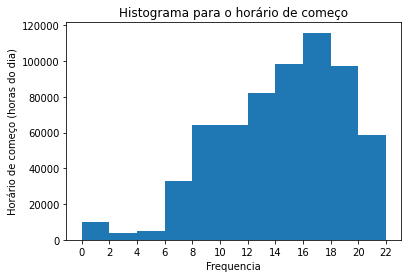

In [ ]:
#histograma pro horário de começo da corrida
plt.hist(data['ended_at'].dt.hour, bins = np.arange(0,24,2))
#titulo
plt.title("Histograma para o horário de começo")
#titulo dos eixos
plt.xlabel("Frequencia")
plt.ylabel("Horário de começo (horas do dia)")
#maradores do eixo x 
plt.xticks(np.arange(0,24,2))
#plota o gráfico
plt.plot()

In [ ]:
#variavel dia da semana de partida
data['Dia da semana (numero)'] = data['started_at'].dt.weekday
data['Dia da semana (nome)'] = data['started_at'].dt.day_name()
#ordena as linhas conforme o dia da semana
data.sort_values(by = 'Dia da semana (numero)', inplace = True)

[]

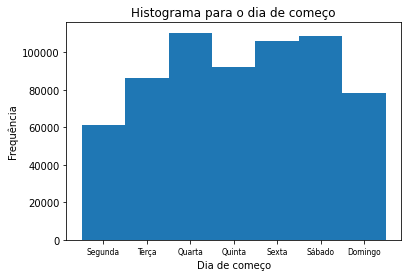

In [ ]:
plt.hist(data['Dia da semana (nome)'],bins = np.arange(0,8,1))
plt.title('Histograma para o dia de começo')
plt.xlabel('Dia de começo')
plt.ylabel('Frequência')
plt.xticks(labels  =  ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo'],ticks = np.arange(0.5,8,1), fontsize = 7.5)
plt.plot()

In [ ]:
data.head(10)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,Dia da semana (numero),Dia da semana (nome)
649982,08A07BB378B0FE2F,docked_bike,2021-02-08 13:31:57,2021-02-08 13:50:45,Berkeley Pl & 7 Ave,4051.01,Clinton St & Tillary St,4748.07,40.675146,-73.975232,40.696233,-73.991421,member,18.800000,0,Monday
301075,1427FDC7F4EF890B,docked_bike,2021-02-15 15:13:34,2021-02-15 15:45:46,E 74 St & 1 Ave,6953.08,E 39 St & Lexington Ave,6389.09,40.768973,-73.954822,40.749499,-73.977292,casual,32.200000,0,Monday
101270,DC98BA7AC747884D,docked_bike,2021-02-08 12:07:44,2021-02-08 12:10:27,W 45 St & 8 Ave,6676.02,W 45 St & 8 Ave,6676.02,40.759291,-73.988597,40.759291,-73.988597,member,2.716667,0,Monday
458285,F21A3DFB0A0D2870,docked_bike,2021-02-15 18:58:01,2021-02-15 19:09:45,5 Ave & E 63 St,6904.06,W 54 St & 9 Ave,6920.03,40.766368,-73.971518,40.765849,-73.986905,member,11.733333,0,Monday
101257,7592499A60EC709F,docked_bike,2021-02-15 21:27:52,2021-02-15 21:45:36,Christopher St & Greenwich St,5847.01,Christopher St & Greenwich St,5847.01,40.732916,-74.007114,40.732916,-74.007114,casual,17.733333,0,Monday
101256,B38BA5CF8B8BEC28,docked_bike,2021-02-22 12:56:54,2021-02-22 13:06:30,Christopher St & Greenwich St,5847.01,Christopher St & Greenwich St,5847.01,40.732915,-74.007113,40.732916,-74.007114,member,9.600000,0,Monday
101253,446468222B9EB0CD,docked_bike,2021-02-22 08:25:15,2021-02-22 08:27:32,Christopher St & Greenwich St,5847.01,Christopher St & Greenwich St,5847.01,40.732915,-74.007113,40.732916,-74.007114,member,2.283333,0,Monday
301084,8FC64F162FF515EE,docked_bike,2021-02-22 16:33:16,2021-02-22 16:51:46,E 44 St & 2 Ave,6422.09,31 Ave & Crescent St,6893.10,40.751183,-73.971387,40.765835,-73.926547,member,18.500000,0,Monday
101250,31EBB19058175B84,docked_bike,2021-02-08 11:22:58,2021-02-08 11:31:50,Mt Morris Park W & W 120 St,7685.14,E 116 St & 2 Ave,7563.06,40.804038,-73.945925,40.796879,-73.937261,member,8.866667,0,Monday
458290,7ED2E1BC07DBC013,docked_bike,2021-02-08 09:23:16,2021-02-08 09:45:37,E 19 St & 3 Ave,5938.01,W 54 St & 9 Ave,6920.03,40.736245,-73.984737,40.765849,-73.986905,member,22.350000,0,Monday
